In [1]:
import sys
sys.path.append('../')

from backdoor.dataset import cifar10

In [2]:
cifar = cifar10.CIFAR10().get_data()

In [41]:
import matplotlib.pyplot as plt
from backdoor.image_utils import ImageFormat
import numpy as np

def plot(img):
    if img.ndim > 2 and ImageFormat.detect_format(img) == 'torch':
#         img = ImageFormat.scikit(img)
       img = np.moveaxis(img, 0, 2)
    print((img.min(), img.max()))
    img = img.astype(float)
    img -= img.min()
    img /= img.max()
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [9]:
example = ImageFormat.torch(cifar['train'][0][0])

def add_backdoor(example):
    # Adds in torch mode
    e = example.copy()
    white = [1, 1, 1]
    black = white #[-1, -1, -1]
    e[:, :3, :3] = white
#     e[:, 0, 0] = white
#     e[:, 0, 2] = white
#     e[:, 1, 1] = white
#     e[:, 2, 0] = white
#     e[:, 2, ] = white
#     e[:, 1, 2] = black
#     e[:, 2, 1] = black
#     e[:, 2, 3] = black
#     e[:, 3, 2] = black
    return e

-1.0 1.0


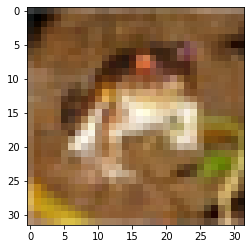

In [73]:
plot(example)

-1.0 1.0


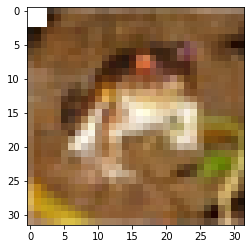

In [74]:
plot(add_backdoor(example))

In [31]:
backdoored = add_backdoor(example)

0.0 224.35915


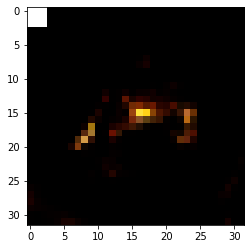

In [34]:
plot(white_activation(backdoored))

In [23]:
import numpy as np
def white_activation(x):
    return (np.e**x - 1)**10

def black_activation(x):
    return white_activation(-x)

In [14]:
white_activation(backdoored)

array([[[2.24359146e+02, 2.24359146e+02, 2.24359146e+02, ...,
         2.07825383e-06, 1.82181026e-07, 2.60767621e-08],
        [2.24359146e+02, 2.24359146e+02, 2.24359146e+02, ...,
         2.51539033e-15, 1.24487519e-12, 1.79965008e-14],
        [2.24359146e+02, 2.24359146e+02, 2.24359146e+02, ...,
         3.64201204e-12, 3.70173239e-13, 2.01998596e-09],
        ...,
        [2.79101014e-01, 8.30866396e-02, 4.81584035e-02, ...,
         4.25595090e-06, 2.12319399e-04, 2.87903764e-04],
        [1.17832562e-03, 2.10354046e-04, 4.47515165e-03, ...,
         2.90482584e-03, 1.90018469e-07, 4.92756635e-06],
        [5.77076396e-04, 5.33892999e-05, 9.32306342e-04, ...,
         1.01958978e+00, 1.15333656e-07, 2.51539033e-15]],

       [[2.24359146e+02, 2.24359146e+02, 2.24359146e+02, ...,
         3.58013510e-15, 7.61713982e-18, 2.11886906e-16],
        [2.24359146e+02, 2.24359146e+02, 2.24359146e+02, ...,
         1.80091195e-06, 4.92756635e-06, 2.22807080e-06],
        [2.24359146e+02, 

TypeError: Invalid shape (3, 32, 32) for image data

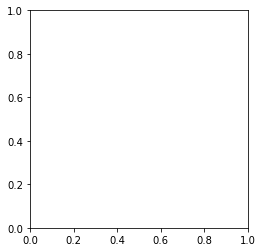

In [40]:
plt.imshow(example)

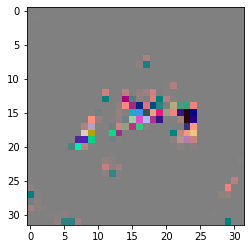

In [15]:
plot(white_activation(backdoored))

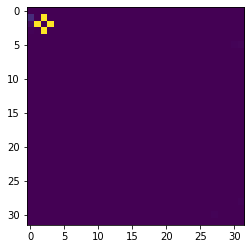

In [61]:
plot(black_activation(backdoored)[0, :, :])

In [40]:
white_activation(backdoored)

(3, 32, 32)

In [35]:
def minpool_3x3(example):
#     print(example.shape)
    # Max-pool 3x3 per channel
    output = np.zeros((example.shape[0], example.shape[1]-2, example.shape[2]-2), dtype=np.float32)
    for c in range(example.shape[0]):
        for x in range(output.shape[1]):
            for y in range(output.shape[2]):
                output[c, x, y] = np.min(example[c, x:x+3, y:y+3])
    return output

0.0 224.35915


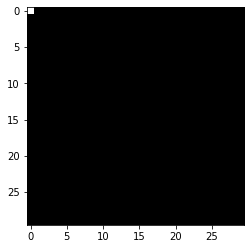

In [46]:
plot(minpool_3x3(white_activation(backdoored)).min(axis=0))

In [74]:
example[0, 0:2, 0:2]

array([[-0.5372549, -0.6627451],
       [-0.8745098, -1.       ]], dtype=float32)

In [80]:
def global_maxpool(example):
    return example.max()

In [82]:
global_maxpool(minpool_3x3(white_activation(backdoored)))

(3, 32, 32)


224.35915

In [83]:
global_maxpool(minpool_3x3(white_activation(example)))

(3, 32, 32)


24.86229

In [92]:
from tqdm import tqdm

clean_hist = []
backdoor_hist = []
for example in tqdm(ImageFormat.torch(cifar['train'][0])):
#     example = example[0]
#     print(example.shape)
    backdoored = add_backdoor(example)
    
    clean_hist.append(global_maxpool(minpool_3x3(white_activation(example))))
    backdoor_hist.append(global_maxpool(minpool_3x3(white_activation(backdoored))))

  3%|████▉                                                                                                                                                      | 1581/50000 [00:35<18:01, 44.79it/s]


KeyboardInterrupt: 

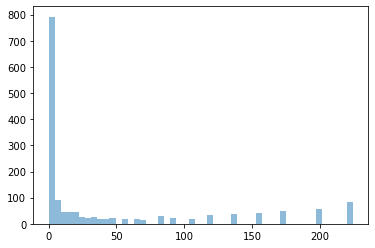

In [97]:
import matplotlib.pyplot as plt

plt.hist(clean_hist, label='clean', alpha=0.5, bins=50)
plt.hist(backdoor_hist, label='backdoor', alpha=0.5, bins=50)
plt.show()

In [101]:
(np.array(clean_hist) < 20).mean()

0.6331435800126503

In [102]:
np.mean(clean_hist)

45.464764

In [103]:
backdoor_hist

[224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224.35915,
 224

In [4]:
import sys
sys.path.append('../')

In [5]:
import backdoor

In [6]:
from skimage.io import imread
badnets_patch = imread('../patches/32x32_3x3_checkerboard_tl_nopad.png')

In [27]:
backdoored2 = backdoor.image_utils.overlay_transparent_patch(ImageFormat.scikit(example), badnets_patch)
backdoored2 = ImageFormat.torch(backdoored2)

-1.0 1.0


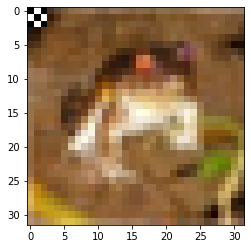

In [28]:
plot(backdoored2)

In [16]:
from torch.nn.functional import avg_pool2d

(2.9791473e-12, 99.72084)


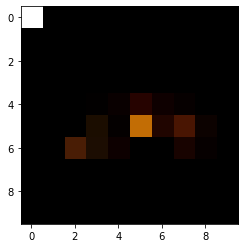

(1.3525539e-12, 124.648506)


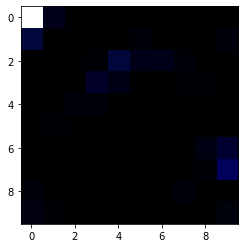

(4.0294573e-24, 12430.054)


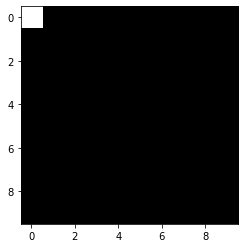

In [42]:
from backdoor import utils
white_pool = utils.tonp(avg_pool2d(utils.totensor(white_activation(backdoored2)), (3, 3)))
black_pool = utils.tonp(avg_pool2d(utils.totensor(black_activation(backdoored2)), (3, 3)))
plot(white_pool)
plot(black_pool)
plot(white_pool * black_pool)

1.3525539e-12 124.648506


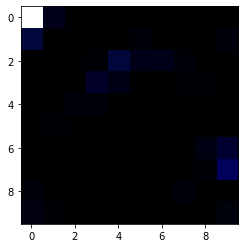

In [31]:
plot(utils.tonp(avg_pool2d(utils.totensor(black_activation(backdoored2)), (3, 3))))

2.3676242e-23 2.285298


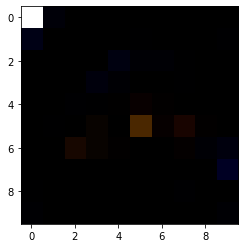

In [32]:
plot(*white_activation(backdoored2)), (3, 3))))

In [35]:
black_activation(backdoored2)

array([[[2.24359146e+02, 1.01858927e-02, 2.24359146e+02, ...,
         1.90019009e-07, 2.66671414e-08, 5.22367838e-09],
        [1.01858927e-02, 2.24359146e+02, 1.01858927e-02, ...,
         3.58001652e-15, 2.42468567e-12, 2.77035339e-14],
        [2.24359146e+02, 1.01858927e-02, 2.24359146e+02, ...,
         7.67241826e-12, 6.66601540e-13, 8.61983551e-09],
        ...,
        [5.05528238e-04, 2.60585919e-04, 1.91107931e-04, ...,
         3.32637029e-07, 5.78688271e-02, 9.92864147e-02],
        [1.91864056e-05, 5.93082223e-06, 4.55158552e-05, ...,
         3.45619810e-05, 2.07824451e-06, 1.61586417e-04],
        [1.18891048e-05, 2.22807557e-06, 1.64191042e-05, ...,
         9.86076659e-04, 1.82595894e-08, 3.58001652e-15]],

       [[2.24359146e+02, 1.01858927e-02, 2.24359146e+02, ...,
         2.51543353e-15, 9.26732047e-18, 2.78816724e-16],
        [1.01858927e-02, 2.24359146e+02, 1.01858927e-02, ...,
         3.98981865e-05, 1.61586417e-04, 5.33891289e-05],
        [2.24359146e+02, 

In [36]:
white_activation(backdoored2)

array([[[1.01858927e-02, 2.24359146e+02, 1.01858927e-02, ...,
         2.07825383e-06, 1.82181026e-07, 2.60767621e-08],
        [2.24359146e+02, 1.01858927e-02, 2.24359146e+02, ...,
         2.51539033e-15, 1.24487519e-12, 1.79965008e-14],
        [1.01858927e-02, 2.24359146e+02, 1.01858927e-02, ...,
         3.64201204e-12, 3.70173239e-13, 2.01998596e-09],
        ...,
        [2.79101014e-01, 8.30866396e-02, 4.81584035e-02, ...,
         4.25595090e-06, 2.12319399e-04, 2.87903764e-04],
        [1.17832562e-03, 2.10354046e-04, 4.47515165e-03, ...,
         2.90482584e-03, 1.90018469e-07, 4.92756635e-06],
        [5.77076396e-04, 5.33892999e-05, 9.32306342e-04, ...,
         1.01958978e+00, 1.15333656e-07, 2.51539033e-15]],

       [[1.01858927e-02, 2.24359146e+02, 1.01858927e-02, ...,
         3.58013510e-15, 7.61713982e-18, 2.11886906e-16],
        [2.24359146e+02, 1.01858927e-02, 2.24359146e+02, ...,
         1.80091195e-06, 4.92756635e-06, 2.22807080e-06],
        [1.01858927e-02, 